# To Do
- Vergleich von Datensätzen
- Input: sdf-Dateinen
- Output: Anzahl und Liste gleicher Elemente + visuelle Darstellung (Venn-Diagramm)

- Importieren der SD-Files in einem Dictionary
- Größe der Datensätze vor dem Vergleich angeben
- Benennung im Venn Diagramm

In [236]:
'''Import of Libraries '''

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Descriptors
from rdkit.Chem import Draw

import seaborn as sns

import pandas as pd

import os

import matplotlib.pyplot as plt

from matplotlib_venn import venn2
from matplotlib_venn import venn3

## Data Import

In [231]:
'''Dictionary out of different number of sd-Files'''

def import_moleculesets(path_to_data: str) -> dict:
    """
    This function returns a Dictionary (Key-Value-Pairs) of SDMolSupplier Objects (Value) and the name of the original 
    SDFile (Key) given the path to the SDFile as input.

    Args:
        path_to_data (str): Path to the directory where the SDFiles are stored (needs to be in '').

    Returns:
        dict: Dictionary of the SDFiles and the SDMolSupplier Objects.
    """
    data_dir = os.path.normpath(str(path_to_data))
    moleculesets = {}
    for moleculeset_name in os.listdir(data_dir):
        moleculeset_path = os.path.join(data_dir, moleculeset_name)
        moleculesets[moleculeset_name] = Chem.SDMolSupplier(moleculeset_path)
    return moleculesets 

testset = import_moleculesets('data')
testset['set_phenole.sdf']
testset

{'set_chlorbenzene-5.sdf': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x21c02ab7470>,
 'set_chlorbenzene.sdf': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x21c02ab4970>,
 'set_phenole.sdf': <rdkit.Chem.rdmolfiles.SDMolSupplier at 0x21c029e98f0>}

## Overview Data Size

In [232]:
'''Length of Moleculesets'''

def get_moleculesets_length(moleculesets: dict):
    """
    This function returns a list of lengths of the SDMolSupplier Objects in a given Dictionary.
    
    Args:
        moleculesets (dict): Dictionary of imported SDFiles.
        
    Returns:
        List[int]: List of Length of the Datasets.
    """
    moleculesets_length = []
    for moleculeset in moleculesets.values():
        moleculeset_length = len(moleculeset)
        moleculesets_length.append(moleculeset_length)
    print('Length of Molecule Sets:')
    return moleculesets_length

get_moleculesets_length(testset)

Length of Molecule Sets:


[50, 100, 100]

## Get Identifier

In [145]:
'''Identifier-List for ONE Dataset'''

def get_identifier_list(
    moleculeset: Chem.SDMolSupplier, 
    id_type : str = "InChIKey"
    ):
    """
    This function returns a list of Chemical InChi or Smiles str for all molecules
    in a given SDMolSupplier object.

    Args:
        moleculeset (rdkit.Chem.SDMolSupplier):
        id_type (str, optional): "InChIKey" or " "Smiles". Defaults to "InChIKey".

    Raises:
        ValueError: if ID_type is not "InChIKey" or "Smiles".

    Returns:
        List[str]: List of identifiers based on given molecules.
    """
    identifier_list = []
    for mol in moleculeset:
        if id_type == "Smiles":
            identifier = Chem.MolToSmiles(mol)
        elif id_type == "InChIKey":
            identifier = Chem.MolToInchiKey(mol)
        else:
            raise ValueError('id_type argument needs to be "Smiles" or "InChIKey"!')
        identifier_list.append(identifier)
    return identifier_list

In [146]:
'''Identifier-List for all Datasets in a Dictionary'''

def get_identifier_lists(moleculesets: dict, id_type: str):
    """
    This function returns a list of lists with Chemical Identifiers (Smiles or InChIKey) form a Dicitionary
    with SDMolSupplier objects using the get_identifier_list function.
    
    Args:
        moleculeset (dict): Dicitionary of SDMolSupplier Objects.
        id_type (str): "InChIKey" or " "Smiles".
        
    Returns:
        List[List(str)]: List of Lists of Identifiers for the molecules in the entries in the Dicitionary.
    """
    identifier_lists = []
    for molset_name in moleculesets.keys():
        identifier_list = get_identifier_list(moleculesets[molset_name], id_type)
        identifier_lists.append(identifier_list)
    return identifier_lists

In [161]:
testlist = get_identifier_lists(testset, "InChIKey")

In [151]:
len(testlist[2])

100

## Testing for Duplicates

In [171]:
def test_for_duplicate(identifier_lists: list):
    """
    This function returns the number of molecules with the same InChIKey or Smiles form the lists in a list of 
    InChiKeys or Smiles
    
    Args:
        identifier_lists (list[list(str)]): List of lists with InChIKeys or Smiles
        
    Returns:
        List[int]: List of the number of duplicates for each list in the input list (identifier_lists) 
    """
    list_of_duplicates = []
    for sublist in identifier_lists:
        if len(sublist) == len(set(sublist)):
            list_of_duplicates.append(0)   
        else:
            duplicate = len(sublist) - len(set(sublist))
            list_of_duplicates.append(duplicate)
    return list_of_duplicates
                    
test_duplicate(testlist)

[0, 0, 2]

In [150]:
len(setinlist[2])

98

## Comparison and Visualisation

In [173]:
class WrongInputError(Exception):
    pass

def get_intersection(
    *args
    ):
    """
    This function takes two or three lists of any type and returns the
    set of elements that are in all given lists. Additionally, it generates
    a venn diagram which is displayed when this function is called in a 
    Jupyter Notebook.

    Raises:
        Exception: An exception is raised if there are not two or three lists.

    Returns:
        set: Set of elements in intersection
    """
    sets = [set(arg) for arg in args]
    if len(args) == 2:
        venn2(sets, set_labels = ('Group A', 'Group B'))
    elif len(args) == 3:
        venn3(sets, set_labels = ('A', 'B', 'C')) # original File name for the naming?
    else:
        raise WrongInputError('The number of given sets needs to be 2 or 3.')
    plt.show()
    return set.intersection(*sets)

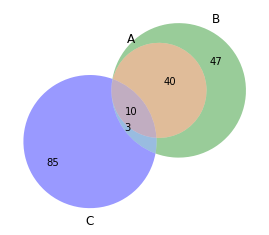

{'AJPXTSMULZANCB-UHFFFAOYSA-N',
 'BOFRXDMCQRTGII-UHFFFAOYSA-N',
 'HFZWRUODUSTPEG-UHFFFAOYSA-N',
 'HORNXRXVQWOLPJ-UHFFFAOYSA-N',
 'ISPYQTSUDJAMAB-UHFFFAOYSA-N',
 'NWSIFTLPLKCTSX-UHFFFAOYSA-N',
 'RANCECPPZPIPNO-UHFFFAOYSA-N',
 'UMPSXRYVXUPCOS-UHFFFAOYSA-N',
 'WDNBURPWRNALGP-UHFFFAOYSA-N',
 'WXNZTHHGJRFXKQ-UHFFFAOYSA-N'}

In [235]:
get_intersection(*testlist)

## Get Descriptor

In [221]:
'''Molekular Weight Descriptor for ONE Input-List'''

def get_molwt(moleculeset : Chem.SDMolSupplier) -> list: 
    """
    This function returns a List of Molecular Weights (float) for all Molecules
    in a given SDMolSupplier object.
    
    Args:
        moleculeset (rdkit.Chem.SDMolSupplier):
    
    Returns:
        List[float]: List of Molecular Weights    
    """
    molwt_list = []
    for mol in moleculeset:
        molwt = Descriptors.MolWt(mol)
        molwt_list.append(molwt)
    return molwt_list

zahlen = get_molwt(testset['set_chlorbenzene-5.sdf'])
type(zahlen[1])

float

In [324]:
'''Molekular Weight Descriptor for Dictionary'''

def get_molwt_lists(moleculesets : dict) -> list:
    """
    This function returns a list of lists with the Molecular Weight (float) of the SDMolSupplier Objects 
    in a Dicitionary.
    
    Args:
        moleculesets (dict): Dicitionary with SDMolSupplier Objects as values
        
    Returns:
        List[List[float]]: List of Lists with Molecular Weight as float number
    """
    molwt_lists = []
    for moleculeset in moleculesets.values():
        molwt_list = get_molwt(moleculeset)
        molwt_lists.append(molwt_list)
    return molwt_lists

mol_lists= get_molwt_lists(testset)

## Binning 

In [251]:
'Binning for ONE List: binning dependent on given list'

def get_bins_with_counts(molwt_list: list, number_of_bins: int):
    """
    This function returns a pandas.core.series.Series Object with equal-width intervals for bins and the number of 
    elements (e.g. number of molecular weights) in every bin given a list of the elements and the number of bins
    
     Args:
        molwt_list (list[float]): List of Elements (e.g. Molecular Weights)
        number_of_bins: Number of Bins which should be used
        
    Returns:
        pandas.core.series.Series: Interval of the bins and counts in every bin
    """
    bins = pd.cut(molwt_list, number_of_bins)
    counts = pd.value_counts(bins)
    return counts

get_bins_with_counts(mol_lists[1], 5)

(141.944, 171.33]     46
(171.33, 200.715]     29
(112.412, 141.944]    15
(200.715, 230.101]     8
(230.101, 259.486]     2
dtype: int64

In [311]:
def get_bin_lists(molwt_lists: list, number_of_bins: int):
    """
    This function returns a List of pandas.core.series.Series Object with equal-width intervals for bins and the number of 
    elements (e.g. number of molecular weights) in every bin given a List of Lists with elements and the number of bins
    
     Args:
        molwt_lists (list[list[float]]): List of Lists of Elements (e.g. Molecular Weights)
        
    Returns:
        List[pandas.core.series.Series]: List of Interval of the bins and counts in every bin
    """
    
    bin_lists = []
    for molwt_list in molwt_lists:
        bin_list = get_bins_with_counts(molwt_list, number_of_bins)
        bin_lists.append(bin_list)
    return bin_lists

bin_lists = get_bin_lists(mol_lists, 10)
bin_lists

[(140.436, 149.728]    15
 (159.02, 168.313]      9
 (121.851, 131.144]     6
 (149.728, 159.02]      6
 (168.313, 177.605]     6
 (177.605, 186.897]     3
 (196.19, 205.482]      3
 (112.466, 121.851]     1
 (186.897, 196.19]      1
 (131.144, 140.436]     0
 dtype: int64,
 (141.944, 156.637]    26
 (171.33, 186.022]     23
 (156.637, 171.33]     20
 (127.252, 141.944]    12
 (186.022, 200.715]     6
 (200.715, 215.408]     6
 (112.412, 127.252]     3
 (215.408, 230.101]     2
 (244.793, 259.486]     2
 (230.101, 244.793]     0
 dtype: int64,
 (125.671, 141.451]    33
 (141.451, 157.23]     20
 (109.892, 125.671]    17
 (157.23, 173.009]      9
 (93.955, 109.892]      7
 (173.009, 188.788]     6
 (188.788, 204.567]     6
 (204.567, 220.347]     1
 (236.126, 251.905]     1
 (220.347, 236.126]     0
 dtype: int64]

In [368]:
'Binning for ONE List: binning independent from given list -> better for comparison(?)'

def get_bins_with_counts_2(molwt_list: list, width_of_bins: int):
    """
    This function returns a pandas.core.series.Series Object with equal-width intervals as bins and the number of 
    elements (e.g. number of molecular weights) in every bin given a list of the elements and the widht of bins
    
     Args:
        molwt_list (list[float]): List of Elements (e.g. Molecular Weights)
        width_of_bins (int): Widht of the Intervals for the bins
        
    Returns:
        pandas.core.series.Series: Interval of the bins and counts in every bin
    """
    if min(molwt_list) > 100 and max(molwt_list) < 300: # threshold to be discussed
        bins = pd.interval_range(start=100, end=300, freq = width_of_bins )
    elif min(molwt_list) > 100 and max(molwt_list) > 300:
        bins = pd.interval_range(start=100, end=500, freq = width_of_bins)
    elif min(molwt_list) < 100 and max(molwt_list) < 300:
        bins = pd.interval_range(start=0, end=300, freq = width_of_bins)
    else:
        bins = pd.interval_range(start=0, end=500, freq = width_of_bins)
    sorted_data = pd.cut(molwt_list, bins)
    counts = pd.value_counts(sorted_data, sort=False)
    return counts

get_bins_with_counts_2(mol_lists[1], 10)

(100, 110]     0
(110, 120]     1
(120, 130]     6
(130, 140]     0
(140, 150]    24
(150, 160]    12
(160, 170]    17
(170, 180]    19
(180, 190]     5
(190, 200]     6
(200, 210]     5
(210, 220]     1
(220, 230]     2
(230, 240]     0
(240, 250]     0
(250, 260]     2
(260, 270]     0
(270, 280]     0
(280, 290]     0
(290, 300]     0
dtype: int64

In [413]:
def get_bin_lists2(molwt_lists: list, width_of_bins: int):
    """
    This function returns a List of pandas.core.series.Series Object with equal-width intervals for bins and the number of 
    elements (e.g. number of molecular weights) in every bin given a List of Lists with elements and the number of bins
    
     Args:
        molwt_lists (list[list[float]]): List of Lists of Elements (e.g. Molecular Weights)
        
    Returns:
        List[pandas.core.series.Series]: List of Interval of the bins and counts in every bin
    """
    
    bin_lists = []
    for molwt_list in molwt_lists:
        bin_list = get_bins_with_counts_2(molwt_list, width_of_bins)
        bin_lists.append(bin_list)
    return bin_lists

bin_lists2 = get_bin_lists2(mol_lists, 20)
bin_lists2

[(100, 120]     1
 (120, 140]     6
 (140, 160]    21
 (160, 180]    15
 (180, 200]     4
 (200, 220]     3
 (220, 240]     0
 (240, 260]     0
 (260, 280]     0
 (280, 300]     0
 dtype: int64,
 (100, 120]     1
 (120, 140]     6
 (140, 160]    36
 (160, 180]    36
 (180, 200]    11
 (200, 220]     6
 (220, 240]     2
 (240, 260]     2
 (260, 280]     0
 (280, 300]     0
 dtype: int64,
 (0, 20]        0
 (20, 40]       0
 (40, 60]       0
 (60, 80]       0
 (80, 100]      1
 (100, 120]    12
 (120, 140]    43
 (140, 160]    21
 (160, 180]    14
 (180, 200]     6
 (200, 220]     2
 (220, 240]     0
 (240, 260]     1
 (260, 280]     0
 (280, 300]     0
 dtype: int64]

## Plot

<AxesSubplot:ylabel='Frequency'>

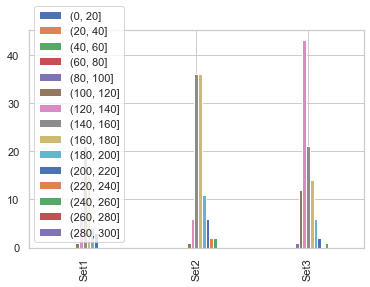

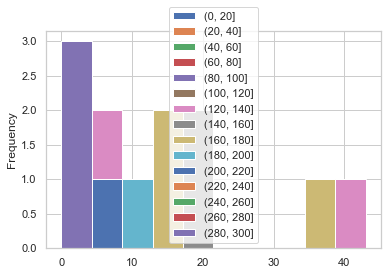

In [437]:
sns.set(style="whitegrid")

df = pd.DataFrame(bin_lists2, index =['Set1', 'Set2', 'Set3'])
df.plot.bar()
df.plot.hist()


## Unimportant (testing and old things)

[Text(0.5, 0, 'Molecular Weight Intervals'), Text(0, 0.5, 'Counts')]

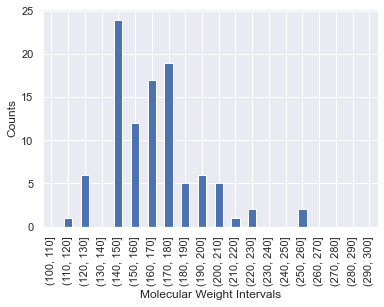

In [353]:
sns.set(style="darkgrid")

q = bin_lists2[1].plot(kind='bar')
q.set(xlabel = "Molecular Weight Intervals", ylabel = "Counts")

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


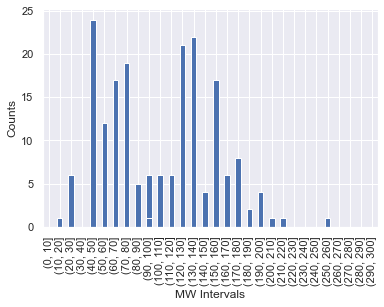

In [355]:
for bin_list in bin_lists2:
    p = bin_list.plot(kind='bar')
    p.set(xlabel = "MW Intervals", ylabel = "Counts")
    print(p)
    

<AxesSubplot:>

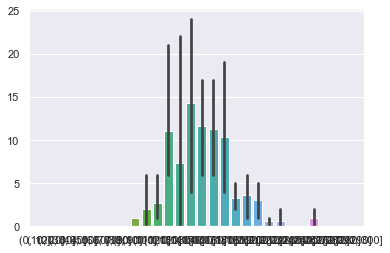

In [379]:
df = pd.DataFrame(bin_lists2)

sns.barplot(data=df)

<AxesSubplot:>

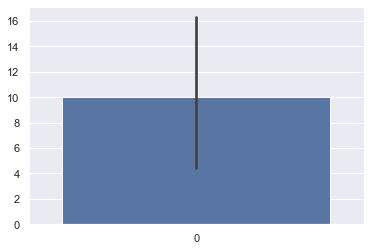

In [320]:
df2 = pd.DataFrame(bin_lists[2])

sns.barplot(data=df2)
#sns.histplot(data=df2)

AxesSubplot(0.125,0.125;0.775x0.755) AxesSubplot(0.125,0.125;0.775x0.755)


matplotlib.axes._subplots.AxesSubplot

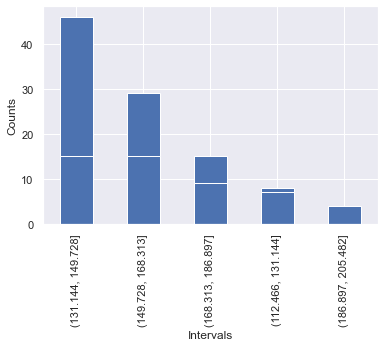

In [303]:
sns.set(style="darkgrid")


q = bin_lists[1].plot(kind='bar')
q.set(xlabel = "Intervals", ylabel = "Counts")

p = bin_lists[0].plot(kind='bar')
p.set_xlabel("Intervals")
p.set_ylabel("Counts")

print(p, q)

type(p)

AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)
AxesSubplot(0.125,0.125;0.775x0.755)


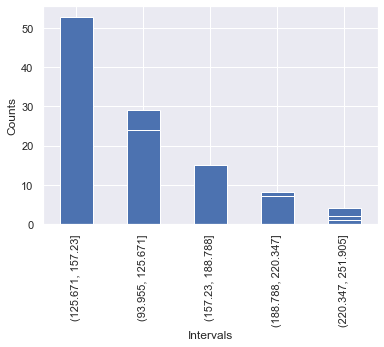

In [300]:
for bin_list in binned_lists:
    p = bin_list.plot(kind='bar')
    p.set(xlabel = "Intervals", ylabel = "Counts")
    print(p)
    

In [252]:
bins = pd.interval_range(start=0, end=6, periods=4)

tesst = pd.cut(mol_lists[1], 5)

bild = pd.value_counts(tesst)
type(bild)

pandas.core.series.Series

<AxesSubplot:ylabel='Frequency'>

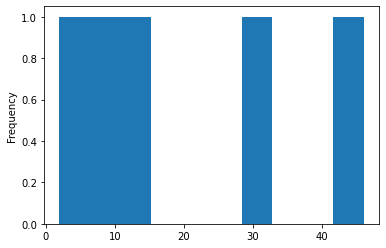

In [249]:
bild.plot(kind='hist')

{'AJPXTSMULZANCB-UHFFFAOYSA-N',
 'BOFRXDMCQRTGII-UHFFFAOYSA-N',
 'HFZWRUODUSTPEG-UHFFFAOYSA-N',
 'HORNXRXVQWOLPJ-UHFFFAOYSA-N',
 'ISPYQTSUDJAMAB-UHFFFAOYSA-N',
 'NWSIFTLPLKCTSX-UHFFFAOYSA-N',
 'RANCECPPZPIPNO-UHFFFAOYSA-N',
 'UMPSXRYVXUPCOS-UHFFFAOYSA-N',
 'WDNBURPWRNALGP-UHFFFAOYSA-N',
 'WXNZTHHGJRFXKQ-UHFFFAOYSA-N'}

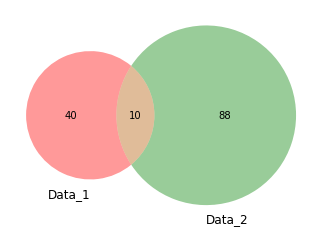

In [229]:
def get_list_of_sets(list_of_lists):
    list_of_sets = [set(list_in_list) for list_in_list in list_of_lists]
    return list_of_sets

setinlist = get_list_of_sets(testlist)
type(setinlist[0])

venn2([setinlist[0], setinlist[2]], set_labels=('Data_1', 'Data_2'))
set.intersection(setinlist[0], setinlist[2])

In [5]:
'''SDF in InChiKey-Liste umwandeln'''

def inchiliste(Datensatz, Vergleich = "InChi"):
    liste = []
    if Vergleich == "Smiles":
        for mol in Datensatz:
            smiles = Chem.MolToSmiles(mol)
            liste.append(smiles)
    else:
        for mol in Datensatz:
            inchikey = Chem.MolToInchiKey(mol)
            liste.append(inchikey)
    return liste

In [6]:
liste1 = inchiliste(set1)
liste2 = inchiliste(set2)
liste3 = inchiliste(set3)
liste4 = inchiliste(set4)

0

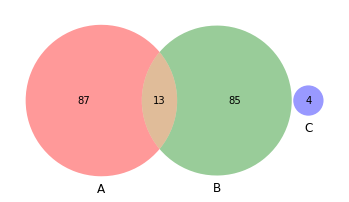

In [7]:
'''Vergleich zwischen drei Listen'''

def vergleich(list1, list2, list3):
    s1 = set(list1)
    s2 = set(list2)
    s3 = set(list3)
    s_all = set.intersection(s1, s2, s3)
    venn3([s1, s2, s3])
    return len(s_all) 

vergleich(liste1, liste2, liste3)

13

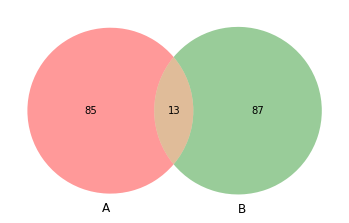

In [27]:
'Vergleich zwischen zwei oder drei Listen'

def vergleich2(list1, list2, list3):
    if list3:
        s1 = set(list1)
        s2 = set(list2)
        s3 = set(list3)
        s_all = set.intersection(s1, s2, s3)
        venn3([s1, s2, s3])
        return len(s_all)
    elif list2:
        s1 = set(list1)
        s2 = set(list2)
        s_all = set.intersection(s1, s2)
        venn2([s1, s2])
        return len(s_all)
    else:
        return 'Kein Vergleich'
    
vergleich2(liste2, liste1, False)